In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve,auc

In [48]:
!ls /storage/data/Ilk_fit

fit_enriched.csv	     fit_enrichment.hdf5
fit_enriched2v5.fasta	     fit_enrichment2v5.hdf5
fit_enriched2v5.fasta_lbl    fit_non_enriched2v5.fasta
fit_enriched2v5.fasta_merge  fit_non_enriched2v5.fasta_lbl


In [3]:
!python /storage/code/encode_simple.py -i /storage/data/Ilk_enrichment/non_enriched2v5.fasta_lbl -o /storage/data/Ilk_enrichment/non_enriched.csv

In [50]:
!python /storage/code/encode_simple.py -i /storage/data/Ilk_fit/fit_non_enriched2v5.fasta_lbl -o /storage/data/Ilk_fit/fit_non_enriched.csv

In [51]:
!python /storage/code/multinouilli.py -i /storage/data/Ilk/Pool5.csv -o /storage/multinouilli/Ilk_pool --inactives /storage/data/Ilk/Pool2.csv
!python /storage/code/multinouilli.py -i /storage/data/Ilk_fit/fit_enriched.csv -o /storage/multinouilli/Ilk_fit --inactives /storage/data/Ilk_fit/fit_non_enriched.csv
!python /storage/code/multinouilli.py -i /storage/data/Ilk_enrichment/enriched.csv -o /storage/multinouilli/Ilk_enrich --inactives /storage/data/Ilk_enrichment/non_enriched.csv

In [58]:
!python /storage/code/multinouilli.py -i /storage/data/Ilk/Pool2.csv -o /storage/multinouilli/Ilk_pool_reverse --inactives /storage/data/Ilk/Pool5.csv

In [59]:
!python /storage/code/multinouilli.py -i /storage/data/Ilk_fit/fit_non_enriched.csv -o /storage/multinouilli/Ilk_fit_reverse --inactives /storage/data/Ilk_fit/fit_enriched.csv

Traceback (most recent call last):
  File "/storage/code/multinouilli.py", line 57, in <module>
    main()
  File "/storage/code/multinouilli.py", line 44, in main
    random = one_hot(np.random.randint(4,size=(len(test),40)))
  File "/storage/code/multinouilli.py", line 17, in one_hot
    data_one_hot = np.zeros((len(data),40,4))
MemoryError


In [56]:
!python /storage/code/multinouilli.py -i /storage/data/Ilk/Pool2.csv -o /storage/multinouilli/Ilk_pool_reverse --inactives /storage/data/Ilk/Pool5.csv
!python /storage/code/multinouilli.py -i /storage/data/Ilk_fit/fit_non_enriched.csv -o /storage/multinouilli/Ilk_fit_reverse --inactives /storage/data/Ilk_fit/fit_enriched.csv
!python /storage/code/multinouilli.py -i /storage/data/Ilk_enrichment/non_enriched.csv -o /storage/multinouilli/Ilk_enrich_reverse --inactives /storage/data/Ilk_enrichment/enriched.csv

Traceback (most recent call last):
  File "/storage/code/multinouilli.py", line 57, in <module>
    main()
  File "/storage/code/multinouilli.py", line 44, in main
    random = one_hot(np.random.randint(4,size=(len(test),40)))
  File "/storage/code/multinouilli.py", line 17, in one_hot
    data_one_hot = np.zeros((len(data),40,4))
MemoryError
^C


In [52]:
!python /storage/code/mf_ising.py -i /storage/data/Ilk/Pool5.csv -o /storage/mf_ising/Ilk_pool --inactives /storage/data/Ilk/Pool2.csv
!python /storage/code/mf_ising.py -i /storage/data/Ilk_fit/fit_enriched.csv -o /storage/mf_ising/Ilk_fit --inactives /storage/data/Ilk_fit/fit_non_enriched.csv
!python /storage/code/mf_ising.py -i /storage/data/Ilk_enrichment/enriched.csv -o /storage/mf_ising/Ilk_enrich --inactives /storage/data/Ilk_enrichment/non_enriched.csv

In [54]:
!python /storage/code/mf_ising.py -i /storage/data/Ilk/Pool5.csv -o /storage/mf_ising/Ilk_pool_reverse --inactives /storage/data/Ilk/Pool2.csv
!python /storage/code/mf_ising.py -i /storage/data/Ilk_fit/fit_enriched.csv -o /storage/mf_ising/Ilk_fit_reverse --inactives /storage/data/Ilk_fit/fit_non_enriched.csv
!python /storage/code/mf_ising.py -i /storage/data/Ilk_enrichment/enriched.csv -o /storage/mf_ising/Ilk_enrich_reverse --inactives /storage/data/Ilk_enrichment/non_enriched.csv

In [6]:
def plot_e(infile,outfile,labels):
    data = pd.read_csv(infile,header=None,sep=' ')
    fig, ax = plt.subplots()
    ax.hist(data[0],label=labels[0],alpha=0.5,bins=100,density=True)
    ax.hist(data[2],label=labels[1],alpha=0.5,bins=100,density=True)
    ax.hist(data[1],label=labels[2],alpha=0.5,bins=100,density=True)
    ax.set_xlabel('Log likelihood')
    ax.set_ylabel('Frequency')
    fig.legend()
    plt.savefig(outfile)

In [15]:
def roc_e(infile,outfile):
    data = pd.read_csv(infile,header=None,sep=' ')
    true_labels = np.concatenate((np.zeros(len(data)),np.ones(len(data))))
    energies = np.concatenate((-data[2].values,-data[0].values))                         
    fpr,tpr,_ = roc_curve(true_labels,energies)
    roc_auc = auc(fpr,tpr)
    fig,ax = plt.subplots()
    ax.plot(fpr,tpr)
    ax.fill_between(fpr,tpr)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    plt.savefig(outfile+'_auc{:.2f}.png'.format(roc_auc))

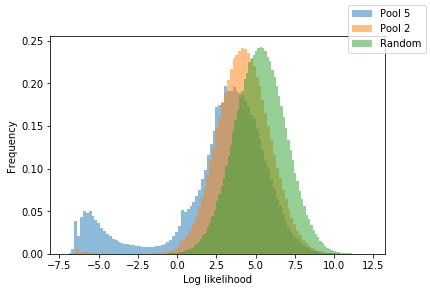

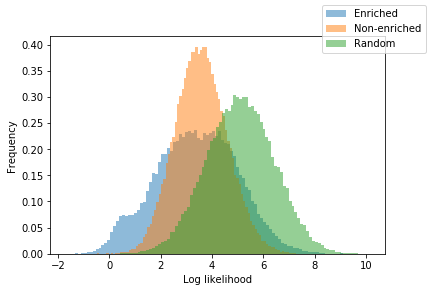

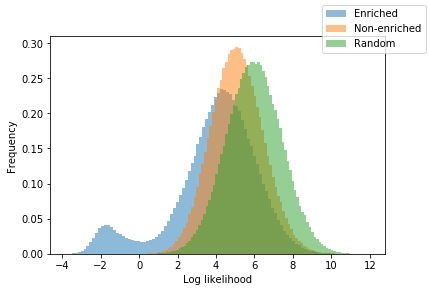

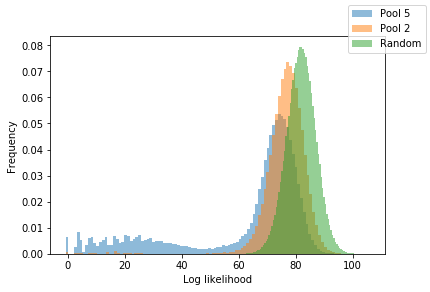

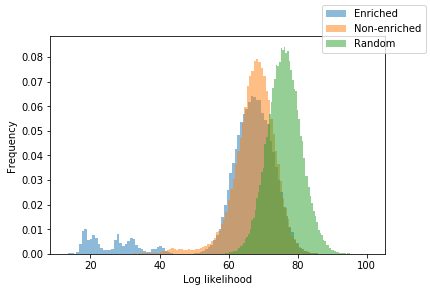

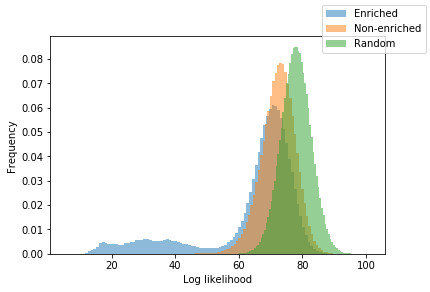

In [7]:
plot_e('/storage/multinouilli/Ilk_pool_E.txt','/storage/figs/Ilk_pool_mn',['Pool 5','Pool 2','Random'])
plot_e('/storage/multinouilli/Ilk_enrich_E.txt','/storage/figs/Ilk_enrich_mn',['Enriched','Non-enriched','Random'])
plot_e('/storage/multinouilli/Ilk_fit_E.txt','/storage/figs/Ilk_fit_mn',['Enriched','Non-enriched','Random'])
plot_e('/storage/mf_ising/Ilk_pool_E.txt','/storage/figs/Ilk_pool_mf',['Pool 5','Pool 2','Random'])
plot_e('/storage/mf_ising/Ilk_enrich_E.txt','/storage/figs/Ilk_enrich_mf',['Enriched','Non-enriched','Random'])
plot_e('/storage/mf_ising/Ilk_fit_E.txt','/storage/figs/Ilk_fit_mf',['Enriched','Non-enriched','Random'])

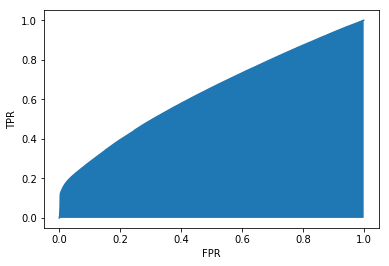

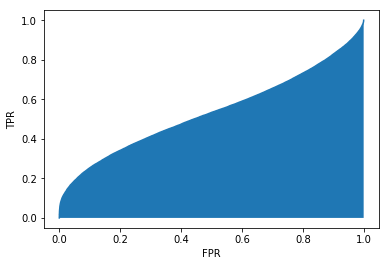

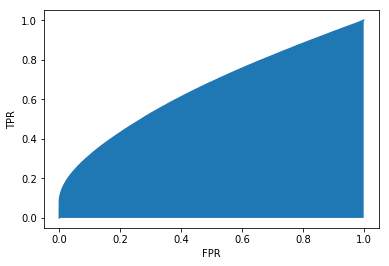

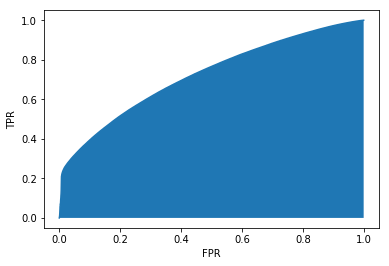

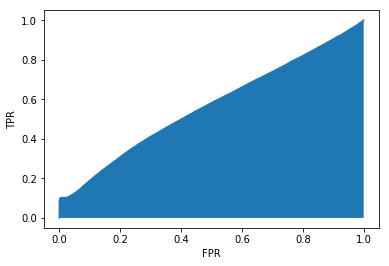

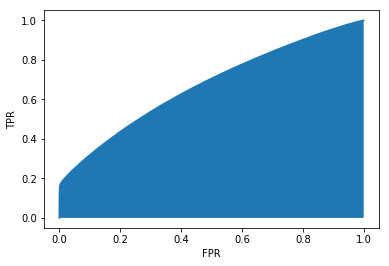

In [16]:
roc_e('/storage/multinouilli/Ilk_pool_E.txt','/storage/figs/Ilk_pool_mn')
roc_e('/storage/multinouilli/Ilk_enrich_E.txt','/storage/figs/Ilk_enrich_mn')
roc_e('/storage/multinouilli/Ilk_fit_E.txt','/storage/figs/Ilk_fit_mn')
roc_e('/storage/mf_ising/Ilk_pool_E.txt','/storage/figs/Ilk_pool_mf')
roc_e('/storage/mf_ising/Ilk_enrich_E.txt','/storage/figs/Ilk_enrich_mf')
roc_e('/storage/mf_ising/Ilk_fit_E.txt','/storage/figs/Ilk_fit_mf')

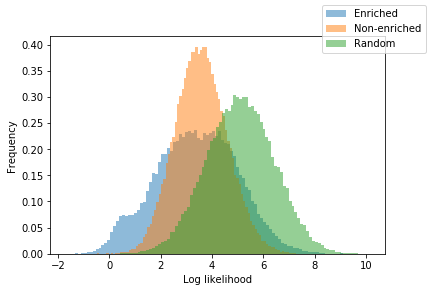

In [4]:
fig = plot_e('/storage/multinouilli/Ilk_enrich_E.txt','/storage/figs/Ilk_enrich_mn',['Enriched','Non-enriched','Random'])

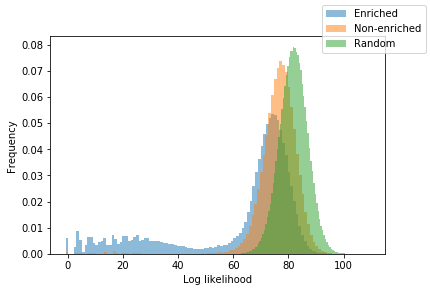

In [75]:
labels = ['Enriched','Non-enriched','Random']
data = pd.read_csv('/storage/multinouilli/Ilk_fit_E.txt',header=None,sep=' ')
fig, ax = plt.subplots()
ax.hist(E_mf_ising[:,0],label=labels[0],alpha=0.5,bins=100,density=True)
ax.hist(E_mf_ising[:,2],label=labels[1],alpha=0.5,bins=100,density=True)
ax.hist(E_mf_ising[:,1],label=labels[2],alpha=0.5,bins=100,density=True)
ax.set_xlabel('Log likelihood')
ax.set_ylabel('Frequency')
fig.legend()
plt.show()

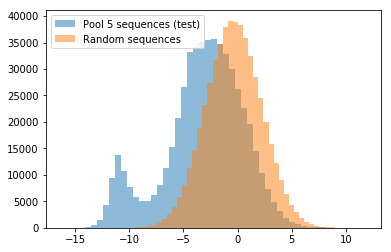

In [44]:
plt.hist(E_multinouilli[0,:],label='Pool 5 sequences (test)',alpha=0.5,bins=50)
plt.hist(-E_multinouilli[1,:],label='Random sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/multinouilli_Ilk_pool_rand')

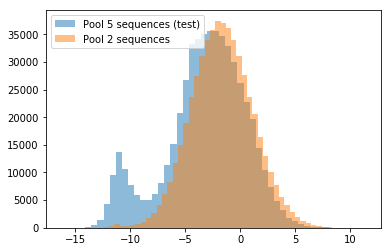

In [45]:
plt.hist(-E_multinouilli[0,:],label='Pool 5 sequences (test)',alpha=0.5,bins=50)
plt.hist(-E_multinouilli[2,:],label='Pool 2 sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/multinouilli_Ilk_pool_2v5')

In [21]:
E_mf_ising = np.genfromtxt('/storage/mf_ising/Ilk_pool_E.txt')
E_mf_ising.shape

(536699, 3)

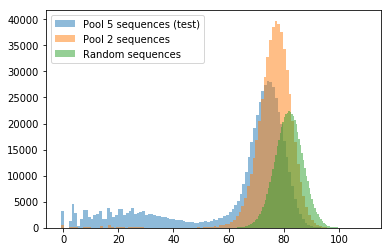

In [23]:
plt.hist(E_mf_ising[:,0],label='Pool 5 sequences (test)',alpha=0.5,bins=100)
plt.hist(E_mf_ising[:,2],label='Pool 2 sequences',alpha=0.5,bins=100)
plt.hist(E_mf_ising[:,1],label='Random sequences',alpha=0.5,bins=100)
plt.legend()
plt.savefig('/storage/figs/mf_ising_Ilk_pool')

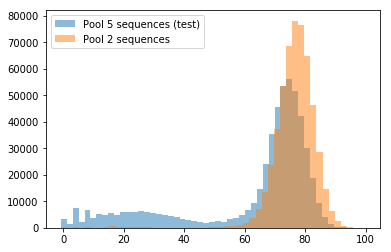

In [8]:
plt.hist(E_mf_ising[:,0],label='Pool 5 sequences (test)',alpha=0.5,bins=50)
plt.hist(E_mf_ising[:,2],label='Pool 2 sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/mf_ising_Ilk_pool_2v5')

In [6]:
!python /storage/code/multinouilli.py -i /storage/data/Ilk_enrichment/enriched.csv -o /storage/multinouilli/Ilk_enrich_fields.txt --inactives /storage/data/Ilk_enrichment/non_enriched.csv

In [7]:
!python /storage/code/mf_ising.py -i /storage/data/Ilk_enrichment/enriched.csv -o /storage/mf_ising/Ilk_enrich --inactives /storage/data/Ilk_enrichment/non_enriched.csv

In [11]:
E_multinouilli_enrich = np.genfromtxt('/storage/multinouilli/Ilk_enrich_fields.txt')
E_mf_ising_enrich = np.genfromtxt('/storage/mf_ising/Ilk_enrich_E.txt')

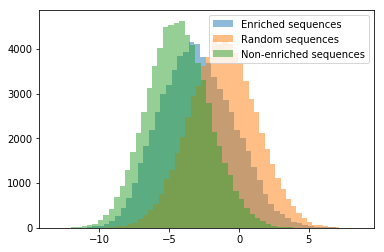

In [19]:
plt.hist(-E_multinouilli_enrich[0,:],label='Enriched sequences',alpha=0.5,bins=50)
plt.hist(-E_multinouilli_enrich[1,:],label='Random sequences',alpha=0.5,bins=50)
plt.hist(-E_multinouilli_enrich[2,:],label='Non-enriched sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/multinouilli_Ilk_enrich')

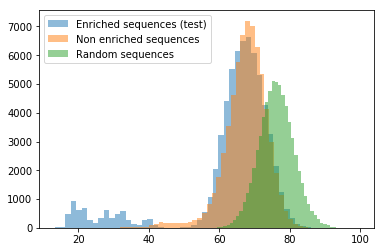

In [18]:
plt.hist(E_mf_ising_enrich[:,0],label='Enriched sequences (test)',alpha=0.5,bins=50)
plt.hist(E_mf_ising_enrich[:,2],label='Non enriched sequences',alpha=0.5,bins=50)
plt.hist(E_mf_ising_enrich[:,1],label='Random sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/mf_ising_Ilk_enrich')

In [ ]:
plt.hist(E_multinouilli_enrich[0,:],label='Enriched sequences',alpha=0.5,bins=50)
plt.hist(E_multinouilli_enrich[1,:],label='Random sequences',alpha=0.5,bins=50)
plt.hist(E_multinouilli_enrich[2,:],label='Non-enriched sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/multinouilli_Ilk_enrich_rand')

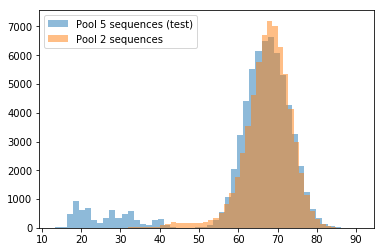

In [13]:
plt.hist(E_mf_ising_enrich[:,0],label='Pool 5 sequences (test)',alpha=0.5,bins=50)
plt.hist(E_mf_ising_enrich[:,2],label='Pool 2 sequences',alpha=0.5,bins=50)
plt.legend()
plt.savefig('/storage/figs/mf_ising_Ilk_enrich_nonenrich')

In [29]:
!python /storage/code/multinouilli.py -i /storage/data/Ilk/Pool2.csv -o /storage/multinouilli/Ilk_pool_2 --inactives /storage/data/Ilk/Pool5.csv

In [33]:
E_multinouilli_reverse = pd.read_csv('/storage/multinouilli/Ilk_pool_2',header=None,sep=' ')
E_multinouilli_reverse.head()

,0,1,2,3,4,5,6,7,8,9,...,1264692,1264693,1264694,1264695,1264696,1264697,1264698,1264699,1264700,1264701
0,-3.194479,1.942168,-0.942712,1.135214,-0.434893,-2.318823,-1.012100,3.452753,-2.528407,-1.410069,...,-1.180303,-1.522327,-1.267329,-2.176746,0.273609,-2.632071,-0.877051,-4.251701,3.403983,1.950791
1,1.680382,1.717031,-2.134673,3.270583,-0.019137,1.156404,0.803451,1.988489,-1.335792,-1.073309,...,0.592847,1.833399,1.231747,0.619919,0.399297,2.560734,-0.971517,-1.283094,-2.523524,-1.391689
2,-0.525147,0.827740,-0.749795,3.803988,-0.525147,0.051776,-0.897960,-0.525147,-0.525147,-2.583515,...,0.472899,-3.331445,1.719284,-4.323400,-4.052489,-1.937804,-0.862633,-1.777012,0.427384,-0.831212


In [31]:
import pandas as pd

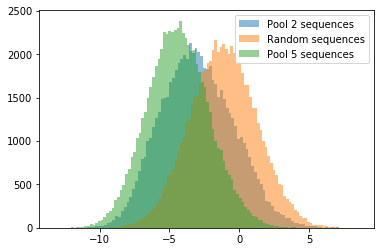

In [46]:
plt.hist(-E_multinouilli_enrich[0,:],label='Pool 2 sequences',alpha=0.5,bins=100)
plt.hist(-E_multinouilli_enrich[1,:],label='Random sequences',alpha=0.5,bins=100)
plt.hist(-E_multinouilli_enrich[2,:],label='Pool 5 sequences',alpha=0.5,bins=100)
plt.legend()
plt.savefig('/storage/figs/multinouilli_Ilk_pool_reverse')

In [39]:
!python /storage/code/mf_ising.py -i /storage/data/Ilk/Pool2.csv -o /storage/mf_ising/Ilk_pool_reverse --inactives /storage/data/Ilk/Pool5.csv

In [44]:
E_mf_ising_reverse = pd.read_csv('/storage/mf_ising/Ilk_pool_reverse_E.txt',header=None,sep=' ').values

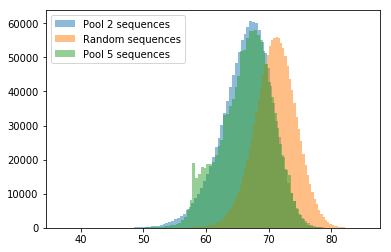

In [47]:
plt.hist(E_mf_ising_reverse[:,0],label='Pool 2 sequences',alpha=0.5,bins=100)
plt.hist(E_mf_ising_reverse[:,1],label='Random sequences',alpha=0.5,bins=100)
plt.hist(E_mf_ising_reverse[:,2],label='Pool 5 sequences',alpha=0.5,bins=100)
plt.legend()
plt.savefig('/storage/figs/mf_ising_Ilk_pool_reverse')

In [53]:
from scipy.stats import ks_2samp
ks_2samp(E_mf_ising_reverse[:,0],E_mf_ising_reverse[:,2])

Ks_2sampResult(statistic=0.02087527338456016, pvalue=7.530317100796453e-240)